
# Getting started with pymoo library for multiobjective optimization
---
Based on https://pymoo.org/getting_started/index.html


### Definition
Optimization problem is defined by:
 min $f_m(x)$ for $m = 1,..., M$  &emsp;&emsp;  $\rightarrow$ **$M$ - objective functions to be minimized**
 so that:
 $g_j(x) \leq 0$ for $j = 1,..., K_1$  &emsp;&emsp;&emsp;  $\rightarrow$ **$K_1$ inequality constraints**
 $h_k(x) = 0$ for $k = 1,..., K_2$     &emsp;&emsp;&emsp;  $\rightarrow$ **$K_2$ equality constraints**
 $x_i^L \leq x_i \leq x_i^U$ for $i = 1,..., N$  &emsp;&emsp;  $\rightarrow$ **Lower and Upper bounds**
 and $x \in \Omega$ &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  $\rightarrow$   **$x$, decision vector from decision (search) space $\Omega$**



## Example 1: A Constrained Bi-objective Optimization Problem
$f_1(x) = 100 (x_1^2 + x_2^2)$  &emsp; &emsp; $\leftarrow$ minimize $f_1$
$f_2(x) = (x_1 - 1)^2 + x_2^2$ &emsp; $\leftarrow$ minimize $f_2$

Constraints:
$x_1 \in [-2,2]$ and $x_2 \in [-2,2]$
$g_1(x) = 2(x_1 - 0.1)(x_1 - 0.1) \leq 0$
$g_2(x) = -20(x_1 - 0.4)(x_1 - 0.6) \leq 0$

In **pymoo**, each objective function is supposed to be **minimized**, and each constraint needs to be provided in the form of **less-or-equal** ($\leq$)


n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       50 |      1 |  0.000000E+00 |  4.0185597251 |             - |             -
     2 |       70 |      2 |  0.000000E+00 |  1.1223769045 |  1.0000000000 |         ideal
     3 |       90 |      3 |  0.000000E+00 |  0.3746409018 |  0.1370862974 |         ideal
     4 |      110 |      4 |  0.000000E+00 |  0.0873535089 |  0.1292231466 |             f
     5 |      130 |      4 |  0.000000E+00 |  0.000000E+00 |  0.0602098688 |             f
     6 |      150 |      6 |  0.000000E+00 |  0.000000E+00 |  0.1169112584 |         ideal
     7 |      170 |      8 |  0.000000E+00 |  0.000000E+00 |  0.4095978023 |         ideal
     8 |      190 |     11 |  0.000000E+00 |  0.000000E+00 |  0.0470923371 |         ideal
     9 |      210 |     15 |  0.000000E+00 |  0.000000E+00 |  0.0603577022 |         ideal
    10 |      230 |     17 |  0.000000E+00 |  0.000000E+00 |  0.0168609481 |         ideal

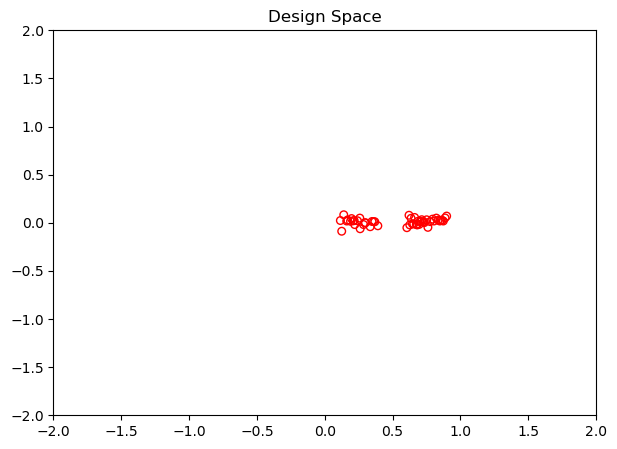

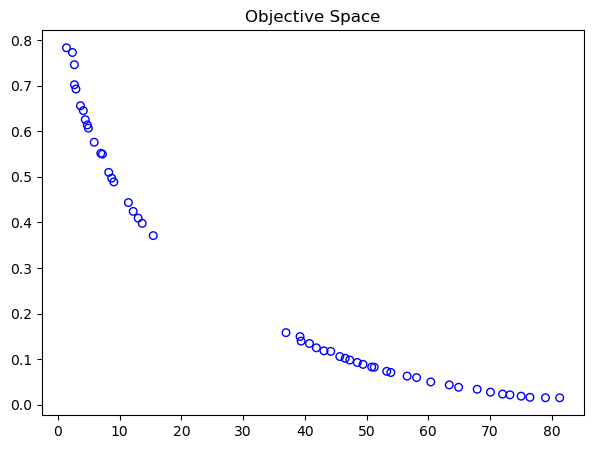

In [4]:
# solving the MOP using the element-wise problem definition
# based on https://pymoo.org/getting_started/part_2.html
import numpy as np
import matplotlib.pyplot as plt

from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling

from pymoo.termination import get_termination
from pymoo.optimize import minimize


# defining the multiobjective solver for the MOP above
class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_ieq_constr=2,
                         xl=np.array([-2,-2]),
                         xu=np.array([2,2]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0]**2 + x[1]**2)  # objective 1
        f2 = (x[0]-1)**2 + x[1]**2      # objective 2

        g1 = 2*(x[0]-0.1) * (x[0]-0.9)    # constraint 1
        g2 = - 20*(x[0]-0.4) * (x[0]-0.6) # constraint 2

        out["F"] = [f1, f2]  # dictionary key for objectives
        out["G"] = [g1, g2]  # dictionary key for contraints

problem = MyProblem()  # init the MOP


# initialize the algorithm object
algorithm = NSGA2(
    pop_size=50,
    n_offsprings=20,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)


# define the termination criterion
termination = get_termination("n_gen", 30)


# solve the MOP
res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

# n_gen  - generation counter,
# n_eval - number of evaluations
# cv_min - minimum constraint violation
# cv_avg - average constraint violation in the current population.
# n_nds  - number of non-dominated solutions
# eps/ind- running performance metrics

X = res.X  # solutions in the decision space
F = res.F  # solutions in the objective space


# plotting the decision space
xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')
plt.xlim(xl[0], xu[0])
plt.ylim(xl[1], xu[1])
plt.title("Design Space")
plt.show()


# plotting the objective space
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()
